# Practical example

## Importing the relevant libraries

In [1]:
# For this practical example we will need the following libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [2]:
# Load the data from a .csv in the same folder
raw_data = pd.read_csv('Data/1.04. Real-life example.csv')

# Let's explore the top 5 rows of the df
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variables

In [3]:
# Descriptive statistics are very useful for initial exploration of the variables
# By default, only descriptives for the numerical variables are shown
# To include the categorical ones, you should specify this with an argument
raw_data.describe(include='all')

# Note that categorical variables don't have some types of numerical descriptives
# and numerical variables don't have some types of categorical descriptives

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
data = raw_data
model = data["Model"].value_counts().rename_axis('Model type').reset_index(name='Counts')
low_model = model["Model type"][model["Counts"] <= 5].values
low_model

array(['Tundra', 'Q3', 'Land Cruiser 80', 'B-Class Electric Drive',
       'T6 (Transporter)', 'A 170', 'GLS 500', 'X6 M', 'S 140', 'Koleos',
       '118', 'Golf Plus', 'G 55 AMG', 'CL 500', 'Z4', 'ML 63 AMG', 'TT',
       'Space Star', 'Passat B8', 'A4 Allroad', 'LT', 'GL 450', 'R8',
       '230', 'Lancer Evolution', '640', 'Grandis', 'Espace', 'Carina',
       'Prius', 'Amarok', 'Passat B2', '550', 'B 200', 'A 140',
       'CL 55 AMG', 'ML 250', '645', '323', '5 Series GT', 'Aygo',
       'ML 400', 'A1', 'S8', '210', 'Eos', '25', 'GLS 400',
       'Sprinter 316', 'A7', '630', 'Hiace', 'GLC-Class', 'ML 270',
       'Sprinter 212', '5 Series', 'CL 63 AMG', 'CLA 200', '116',
       'CLK 320', 'Tacoma', 'New Beetle', 'Eclipse', 'Captur', '760',
       'Dokker', 'Golf GTI', 'Beetle', 'GL 500', 'SLK 200',
       'T3 (Transporter)', 'Up', 'S-Guard', 'Sprinter 213', 'Lupo',
       'GL 550', 'Avalon', 'CLS 63 AMG', '335', 'Sprinter 319', 'I3',
       'Sienna', 'S 280', 'S4', 'S 430', 'Celica'

In [5]:
num_rows = data.shape[0]
danger_rows = []
for i in range(num_rows):
    if data["Model"].iloc[i] in list(low_model):
        danger_rows.append(i)
data = data.drop(danger_rows, axis = 0)
data.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3956,3803.000000,3956,3956.000000,3820.000000,3956,3956,3956.000000,3956
unique,7,NaN,6,NaN,NaN,4,2,NaN,131
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,891,NaN,1561,NaN,NaN,1910,3591,NaN,199
mean,NaN,18862.699574,NaN,163.187563,2.769330,NaN,NaN,2006.642568,NaN
std,NaN,24947.919118,NaN,104.471099,5.223445,NaN,NaN,6.559898,NaN
min,NaN,600.000000,NaN,0.000000,1.000000,NaN,NaN,1978.000000,NaN
25%,NaN,6925.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11200.000000,NaN,159.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,20879.575000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determining the variables of interest

In [6]:
# For these several lessons, we will create the regression without 'Model'
# Certainly, when you work on the problem on your own, you could create a regression with 'Model'
# Let's check the descriptives without 'Model'
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3956,3803.000000,3956,3956.000000,3820.000000,3956,3956,3956.000000,3956
unique,7,NaN,6,NaN,NaN,4,2,NaN,131
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,891,NaN,1561,NaN,NaN,1910,3591,NaN,199
mean,NaN,18862.699574,NaN,163.187563,2.769330,NaN,NaN,2006.642568,NaN
std,NaN,24947.919118,NaN,104.471099,5.223445,NaN,NaN,6.559898,NaN
min,NaN,600.000000,NaN,0.000000,1.000000,NaN,NaN,1978.000000,NaN
25%,NaN,6925.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11200.000000,NaN,159.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,20879.575000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Dealing with missing values

In [7]:
# data.isnull() # shows a df with the information whether a data point is null 
# Since True = the data point is missing, while False = the data point is not missing, we can sum them
# This will give us the total number of missing values feature-wise
data.isnull().sum()

Brand             0
Price           153
Body              0
Mileage           0
EngineV         136
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [8]:
# Let's simply drop all missing values
# This is not always recommended, however, when we remove less than 5% of the data, it is okay
data_no_mv = data.dropna(axis=0)

In [9]:
# Let's check the descriptives without the missing values
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3669,3669.000000,3669,3669.000000,3669.000000,3669,3669,3669.000000,3669
unique,7,NaN,6,NaN,NaN,4,2,NaN,131
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,839,NaN,1451,NaN,NaN,1759,3330,NaN,188
mean,NaN,19032.109697,NaN,165.342873,2.741529,NaN,NaN,2006.482965,NaN
std,NaN,25205.392832,NaN,102.050112,5.079000,NaN,NaN,6.538540,NaN
min,NaN,600.000000,NaN,0.000000,1.000000,NaN,NaN,1978.000000,NaN
25%,NaN,6999.000000,NaN,95.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11300.000000,NaN,160.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,20999.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Exploring the PDFs

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

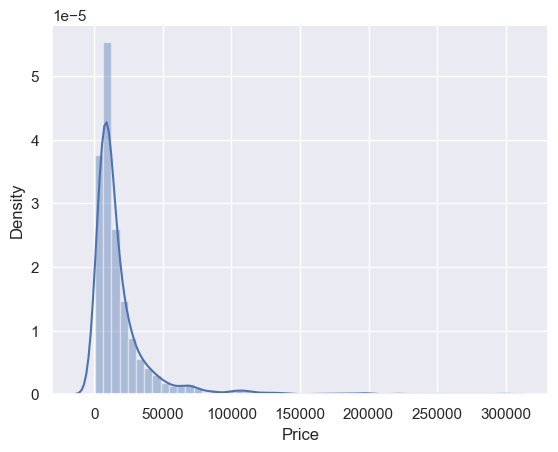

In [10]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
sns.distplot(data_no_mv['Price'])

### Dealing with outliers

In [11]:
# Obviously there are some outliers present 

# Without diving too deep into the topic, we can deal with the problem easily by removing 0.5%, or 1% of the problematic samples
# Here, the outliers are situated around the higher prices (right side of the graph)
# Logic should also be applied
# This is a dataset about used cars, therefore one can imagine how $300,000 is an excessive price

# Outliers are a great issue for OLS, thus we must deal with them in some way
# It may be a useful exercise to try training a model without removing the outliers

# Let's declare a variable that will be equal to the 99th percentile of the 'Price' variable
q = data_no_mv['Price'].quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = data_no_mv[data_no_mv['Price']<q]
# In this way we have essentially removed the top 1% of the data about 'Price'
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3632,3632.000000,3632,3632.000000,3632.000000,3632,3632,3632.000000,3632
unique,7,NaN,6,NaN,NaN,4,2,NaN,130
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,839,NaN,1444,NaN,NaN,1751,3293,NaN,188
mean,NaN,17353.144956,NaN,166.883811,2.720419,NaN,NaN,2006.397026,NaN
std,NaN,18406.367066,NaN,101.385778,5.099575,NaN,NaN,6.513835,NaN
min,NaN,600.000000,NaN,0.000000,1.000000,NaN,NaN,1978.000000,NaN
25%,NaN,6950.000000,NaN,97.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11050.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,20500.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

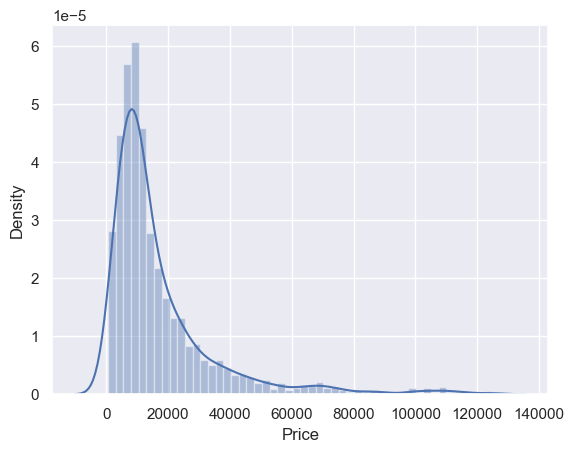

In [12]:
# We can check the PDF once again to ensure that the result is still distributed in the same way overall
# however, there are much fewer outliers
sns.distplot(data_1['Price'])

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

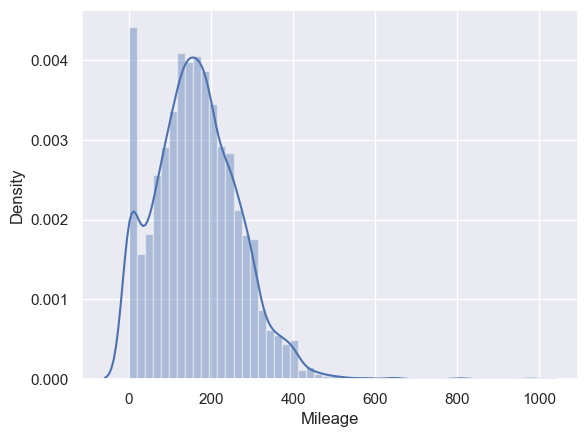

In [13]:
# We can treat the other numerical variables in a similar way
sns.distplot(data_no_mv['Mileage'])

In [14]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

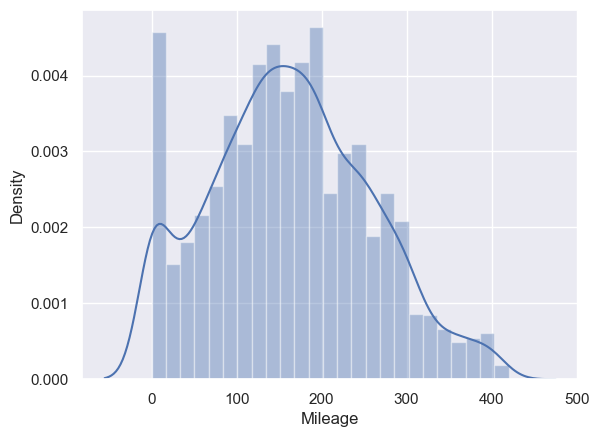

In [15]:
# This plot looks kind of normal, doesn't it?
sns.distplot(data_2['Mileage'])

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

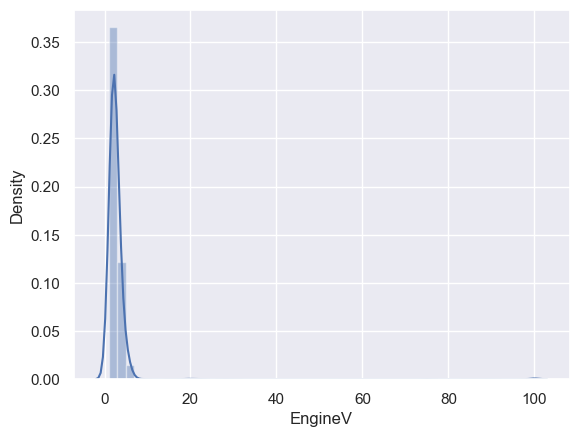

In [16]:
# The situation with engine volume is very strange
# In such cases it makes sense to manually check what may be causing the problem
# In our case the issue comes from the fact that most missing values are indicated with 99.99 or 99
# There are also some incorrect entries like 75
sns.distplot(data_no_mv['EngineV'])

In [17]:
# A simple Google search can indicate the natural domain of this variable
# Car engine volumes are usually (always?) below 6.5l
# This is a prime example of the fact that a domain expert (a person working in the car industry)
# may find it much easier to determine problems with the data than an outsider
data_3 = data_2[data_2['EngineV']<6.5]

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

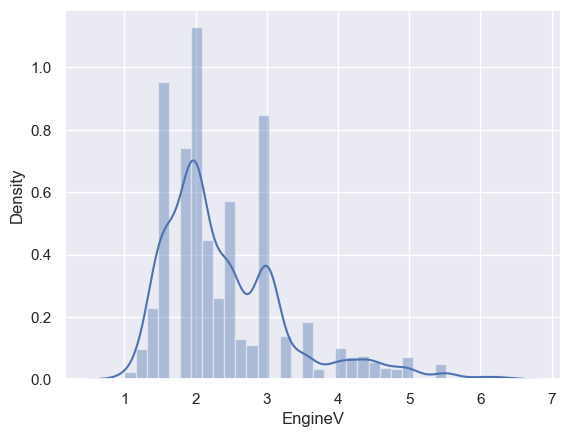

In [18]:
# Following this graph, we realize we can actually treat EngineV as a categorical variable
# Even so, in this course we won't, but that's yet something else you may try on your own
sns.distplot(data_3['EngineV'])

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

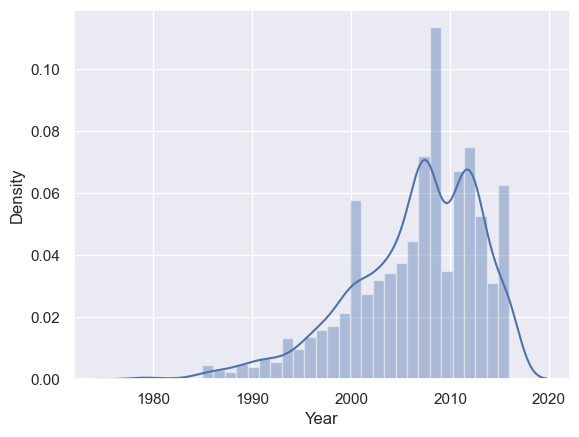

In [19]:
# Finally, the situation with 'Year' is similar to 'Price' and 'Mileage'
# However, the outliers are on the low end
sns.distplot(data_no_mv['Year'])

In [20]:
# I'll simply remove them
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

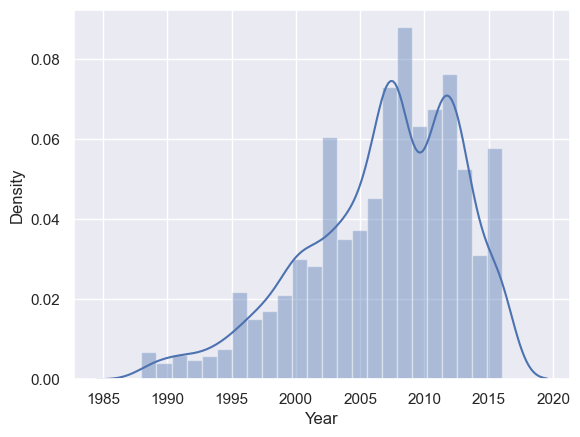

In [21]:
# Here's the new result
sns.distplot(data_4['Year'])

In [22]:
# When we remove observations, the original indexes are preserved
# If we remove observations with indexes 2 and 3, the indexes will go as: 0,1,4,5,6
# That's very problematic as we tend to forget about it (later you will see an example of such a problem)

# Finally, once we reset the index, a new column will be created containing the old index (just in case)
# We won't be needing it, thus 'drop=True' to completely forget about it
data_cleaned = data_4.reset_index(drop=True)

In [23]:
# Let's see what's left
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3533,3533.000000,3533,3533.000000,3533.000000,3533,3533,3533.000000,3533
unique,7,NaN,6,NaN,NaN,4,2,NaN,130
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,809,NaN,1392,NaN,NaN,1708,3202,NaN,180
mean,NaN,17669.454070,NaN,162.266912,2.411783,NaN,NaN,2006.761676,NaN
std,NaN,18508.313096,NaN,94.151394,0.887275,NaN,NaN,6.024049,NaN
min,NaN,800.000000,NaN,0.000000,1.000000,NaN,NaN,1988.000000,NaN
25%,NaN,7199.000000,NaN,95.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,160.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,20900.000000,NaN,227.000000,3.000000,NaN,NaN,2012.000000,NaN


## Checking the OLS assumptions

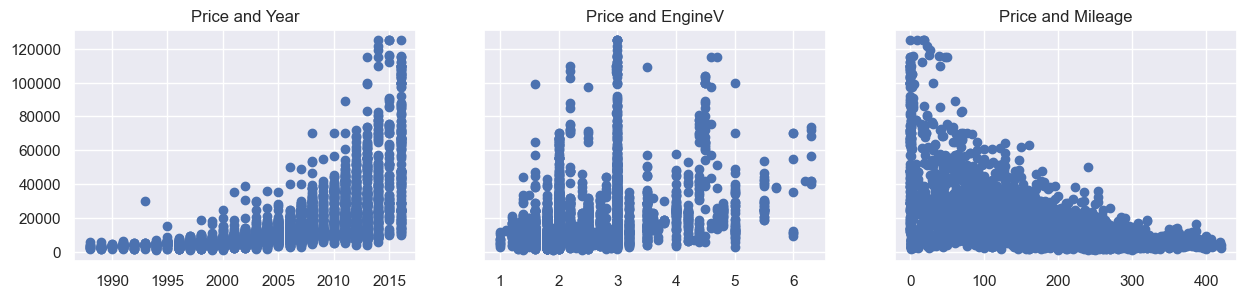

In [24]:
# Here we decided to use some matplotlib code, without explaining it
# You can simply use plt.scatter() for each of them (with your current knowledge)
# But since Price is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

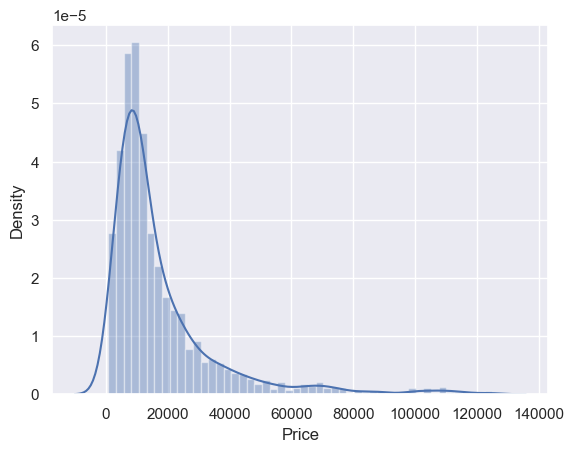

In [25]:
# From the subplots and the PDF of price, we can easily determine that 'Price' is exponentially distributed
# A good transformation in that case is a log transformation
sns.distplot(data_cleaned['Price'])

### Relaxing the assumptions

In [26]:
# Let's transform 'Price' with a log transformation
log_price = np.log(data_cleaned['Price'])

# Then we add it to our data frame
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
2,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
3,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
4,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6,9.560997
...,...,...,...,...,...,...,...,...,...,...
3528,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter),9.350102
3529,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556
3530,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350,11.736069
3531,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535,8.779557


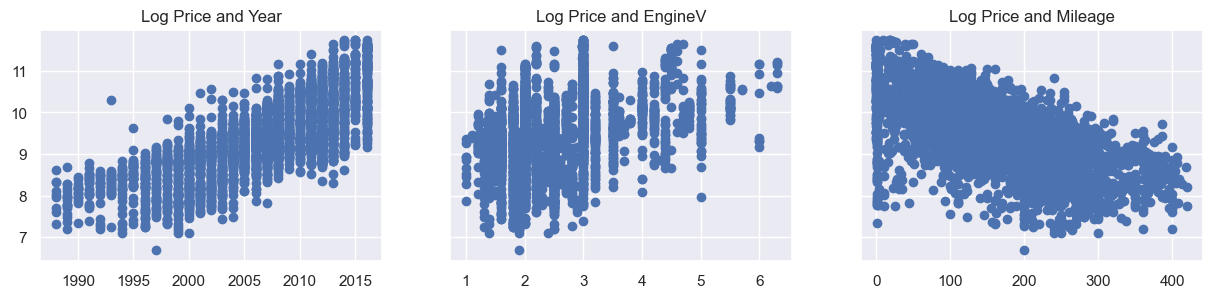

In [27]:
# Let's check the three scatters once again
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

# The relationships show a clear linear relationship
# This is some good linear regression material

# Alternatively we could have transformed each of the independent variables

In [28]:
# Since we will be using the log price variable, we can drop the old 'Price' one
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### Multicollinearity

In [29]:
# Let's quickly see the columns of our data frame
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model', 'log_price'], dtype=object)

In [30]:
# sklearn does not have a built-in way to check for multicollinearity
# one of the main reasons is that this is an issue well covered in statistical frameworks and not in ML ones
# surely it is an issue nonetheless, thus we will try to deal with it

# Here's the relevant module
# full documentation: http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = data_cleaned[['Mileage','Year','EngineV']]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [31]:
# Let's explore the result
vif

,VIF,Features
0,3.944758,Mileage
1,11.073868,Year
2,8.391875,EngineV


In [32]:
# Since Year has the highest VIF, I will remove it from the model
# This will drive the VIF of other variables down!!! 
# So even if EngineV seems with a high VIF, too, once 'Year' is gone that will no longer be the case
# data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)
data_no_multicollinearity = data_cleaned

## Create dummy variables

In [33]:
# To include the categorical data in the regression, let's create dummies
# There is a very convenient method called: 'get_dummies' which does that seemlessly
# It is extremely important that we drop one of the dummies, alternatively we will introduce multicollinearity
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [34]:
# Here's the result
pd.set_option('display.max_columns', 500)
data_with_dummies.head()

,Mileage,EngineV,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes,Model_190,Model_200,Model_316,Model_318,Model_320,Model_325,Model_328,Model_330,Model_520,Model_523,Model_525,Model_528,Model_530,Model_535,Model_540,Model_730,Model_735,Model_740,Model_745,Model_750,Model_80,Model_A3,Model_A4,Model_A5,Model_A6,Model_A6 Allroad,Model_A8,Model_ASX,Model_Auris,Model_Avensis,Model_B 180,Model_Bora,Model_C-Class,Model_CLS 350,Model_Caddy,Model_Camry,Model_Caravelle,Model_Carisma,Model_Clio,Model_Colt,Model_Corolla,Model_Duster,Model_E-Class,Model_FJ Cruiser,Model_Fluence,Model_G 350,Model_G 500,Model_G 63 AMG,Model_GL 320,Model_GL 350,Model_GLE-Class,Model_GLS 350,Model_Galant,Model_Golf II,Model_Golf III,Model_Golf IV,Model_Golf V,Model_Golf VI,Model_Golf VII,Model_Golf Variant,Model_Grand Scenic,Model_Highlander,Model_Hilux,Model_Jetta,Model_Kangoo,Model_L 200,Model_Laguna,Model_Lancer,Model_Lancer X,Model_Land Cruiser 100,Model_Land Cruiser 200,Model_Land Cruiser Prado,Model_Logan,Model_M5,Model_ML 320,Model_ML 350,Model_Master,Model_Megane,Model_Multivan,Model_Outlander,Model_Outlander XL,Model_Pajero,Model_Pajero Sport,Model_Pajero Wagon,Model_Passat B3,Model_Passat B4,Model_Passat B5,Model_Passat B6,Model_Passat B7,Model_Passat CC,Model_Phaeton,Model_Polo,Model_Q5,Model_Q7,Model_Rav 4,Model_S 320,Model_S 350,Model_S 400,Model_S 500,Model_S 550,Model_S 600,Model_S 63 AMG,Model_Sandero,Model_Scenic,Model_Scirocco,Model_Sharan,Model_Sprinter 312,Model_Sprinter 313,Model_Symbol,Model_T4 (Transporter),Model_T4 (Transporter),Model_T5 (Transporter),Model_T5 (Transporter),Model_T6 (Transporter),Model_Tiguan,Model_Touareg,Model_Touran,Model_Trafic,Model_V 250,Model_Vento,Model_Venza,Model_Viano,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_Yaris
0,277,2.0,1991,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,358,5.0,2003,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,240,4.2,2007,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,120,2.0,2011,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,200,2.7,2006,9.560997,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Rearrange a bit

In [35]:
# To make our data frame more organized, we prefer to place the dependent variable in the beginning of the df
# Since each problem is different, that must be done manually
# We can display all possible features and then choose the desired order
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'Year', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_190', 'Model_200', 'Model_316', 'Model_318', 'Model_320',
       'Model_325', 'Model_328', 'Model_330', 'Model_520', 'Model_523',
       'Model_525', 'Model_528', 'Model_530', 'Model_535', 'Model_540',
       'Model_730', 'Model_735', 'Model_740', 'Model_745', 'Model_750',
       'Model_80', 'Model_A3', 'Model_A4', 'Model_A5', 'Model_A6',
       'Model_A6 Allroad', 'Model_A8', 'Model_ASX', 'Model_Auris',
       'Model_Avensis', 'Model_B 180', 'Model_Bora', 'Model_C-Class',
       'Model_CLS 350', 'Model_Caddy', 'Model_Camry', 'Model_Caravelle',
       'Model_Carisma', 'Model_Clio', 'Model_Colt', 'Model_Corolla',
       'Model_Duster', 'Model

In [36]:
# To make the code a bit more parametrized, let's declare a new variable that will contain the preferred order
# If you want a different order, just specify it here
# Conventionally, the most intuitive order is: dependent variable, indepedendent numerical variables, dummies
cols = ['log_price', 'Mileage', 'EngineV', 'Year', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_190', 'Model_200', 'Model_316', 'Model_318', 'Model_320',
       'Model_325', 'Model_328', 'Model_330', 'Model_520', 'Model_523',
       'Model_525', 'Model_528', 'Model_530', 'Model_535', 'Model_540',
       'Model_730', 'Model_735', 'Model_740', 'Model_745', 'Model_750',
       'Model_80', 'Model_A3', 'Model_A4', 'Model_A5', 'Model_A6',
       'Model_A6 Allroad', 'Model_A8', 'Model_ASX', 'Model_Auris',
       'Model_Avensis', 'Model_B 180', 'Model_Bora', 'Model_C-Class',
       'Model_CLS 350', 'Model_Caddy', 'Model_Camry', 'Model_Caravelle',
       'Model_Carisma', 'Model_Clio', 'Model_Colt', 'Model_Corolla',
       'Model_Duster', 'Model_E-Class', 'Model_FJ Cruiser',
       'Model_Fluence', 'Model_G 350', 'Model_G 500', 'Model_G 63 AMG',
       'Model_GL 320', 'Model_GL 350', 'Model_GLE-Class', 'Model_GLS 350',
       'Model_Galant', 'Model_Golf II', 'Model_Golf III', 'Model_Golf IV',
       'Model_Golf V', 'Model_Golf VI', 'Model_Golf VII',
       'Model_Golf Variant', 'Model_Grand Scenic', 'Model_Highlander',
       'Model_Hilux', 'Model_Jetta', 'Model_Kangoo', 'Model_L 200',
       'Model_Laguna', 'Model_Lancer', 'Model_Lancer X',
       'Model_Land Cruiser 100', 'Model_Land Cruiser 200',
       'Model_Land Cruiser Prado', 'Model_Logan', 'Model_M5',
       'Model_ML 320', 'Model_ML 350', 'Model_Master', 'Model_Megane',
       'Model_Multivan', 'Model_Outlander', 'Model_Outlander XL',
       'Model_Pajero', 'Model_Pajero Sport', 'Model_Pajero Wagon',
       'Model_Passat B3', 'Model_Passat B4', 'Model_Passat B5',
       'Model_Passat B6', 'Model_Passat B7', 'Model_Passat CC',
       'Model_Phaeton', 'Model_Polo', 'Model_Q5', 'Model_Q7',
       'Model_Rav 4', 'Model_S 320', 'Model_S 350', 'Model_S 400',
       'Model_S 500', 'Model_S 550', 'Model_S 600', 'Model_S 63 AMG',
       'Model_Sandero', 'Model_Scenic', 'Model_Scirocco', 'Model_Sharan',
       'Model_Sprinter 312', 'Model_Sprinter 313', 'Model_Symbol',
       'Model_T4 (Transporter)', 'Model_T4 (Transporter) ',
       'Model_T5 (Transporter)', 'Model_T5 (Transporter) ',
       'Model_T6 (Transporter) ', 'Model_Tiguan', 'Model_Touareg',
       'Model_Touran', 'Model_Trafic', 'Model_V 250', 'Model_Vento',
       'Model_Venza', 'Model_Viano', 'Model_Vito', 'Model_X1', 'Model_X3',
       'Model_X5', 'Model_X5 M', 'Model_X6', 'Model_Yaris']

In [37]:
# To implement the reordering, we will create a new df, which is equal to the old one but with the new order of features
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes,Model_190,Model_200,Model_316,Model_318,Model_320,Model_325,Model_328,Model_330,Model_520,Model_523,Model_525,Model_528,Model_530,Model_535,Model_540,Model_730,Model_735,Model_740,Model_745,Model_750,Model_80,Model_A3,Model_A4,Model_A5,Model_A6,Model_A6 Allroad,Model_A8,Model_ASX,Model_Auris,Model_Avensis,Model_B 180,Model_Bora,Model_C-Class,Model_CLS 350,Model_Caddy,Model_Camry,Model_Caravelle,Model_Carisma,Model_Clio,Model_Colt,Model_Corolla,Model_Duster,Model_E-Class,Model_FJ Cruiser,Model_Fluence,Model_G 350,Model_G 500,Model_G 63 AMG,Model_GL 320,Model_GL 350,Model_GLE-Class,Model_GLS 350,Model_Galant,Model_Golf II,Model_Golf III,Model_Golf IV,Model_Golf V,Model_Golf VI,Model_Golf VII,Model_Golf Variant,Model_Grand Scenic,Model_Highlander,Model_Hilux,Model_Jetta,Model_Kangoo,Model_L 200,Model_Laguna,Model_Lancer,Model_Lancer X,Model_Land Cruiser 100,Model_Land Cruiser 200,Model_Land Cruiser Prado,Model_Logan,Model_M5,Model_ML 320,Model_ML 350,Model_Master,Model_Megane,Model_Multivan,Model_Outlander,Model_Outlander XL,Model_Pajero,Model_Pajero Sport,Model_Pajero Wagon,Model_Passat B3,Model_Passat B4,Model_Passat B5,Model_Passat B6,Model_Passat B7,Model_Passat CC,Model_Phaeton,Model_Polo,Model_Q5,Model_Q7,Model_Rav 4,Model_S 320,Model_S 350,Model_S 400,Model_S 500,Model_S 550,Model_S 600,Model_S 63 AMG,Model_Sandero,Model_Scenic,Model_Scirocco,Model_Sharan,Model_Sprinter 312,Model_Sprinter 313,Model_Symbol,Model_T4 (Transporter),Model_T4 (Transporter),Model_T5 (Transporter),Model_T5 (Transporter),Model_T6 (Transporter),Model_Tiguan,Model_Touareg,Model_Touran,Model_Trafic,Model_V 250,Model_Vento,Model_Venza,Model_Viano,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_Yaris
0,8.342840,277,2.0,1991,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9.495519,358,5.0,2003,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10.043249,240,4.2,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9.814656,120,2.0,2011,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9.560997,200,2.7,2006,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Linear regression model

### Declare the inputs and the targets

In [38]:
# The target(s) (dependent variable) is 'log price'
targets = data_preprocessed['log_price']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['log_price'],axis=1)

### Scale the data

In [39]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler()

In [40]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [41]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [42]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [43]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

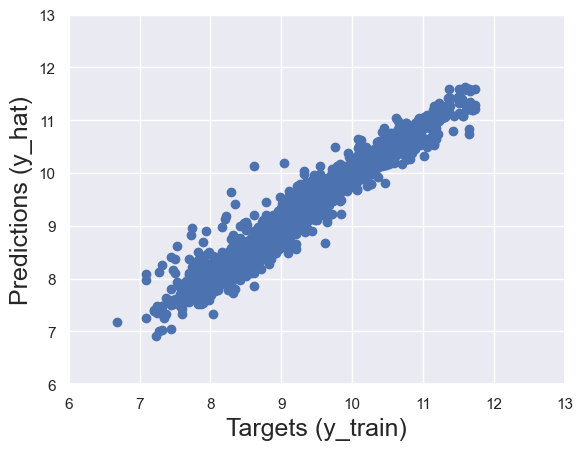

In [44]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

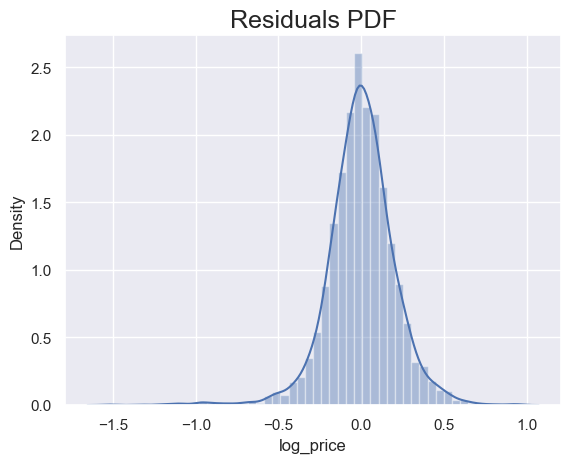

In [45]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)
# This is food for thought to improve our model

In [46]:
# Find the R-squared of the model
reg.score(x_train,y_train)

# Note that this is NOT the adjusted R-squared
# in other words... find the Adjusted R-squared to have the appropriate measure :)

0.9418874996702215

### Finding the weights and bias

In [47]:
# Obtain the bias (intercept) of the regression
reg.intercept_

9.39920084581079

In [48]:
# Obtain the weights (coefficients) of the regression
reg.coef_

# Note that they are barely interpretable if at all

array([-7.16962572e-02,  6.98900676e-02,  5.38365062e-01, -9.20560832e+11,
       -9.47941803e+11, -3.24798172e+12, -2.96758775e+12, -5.32511378e+11,
       -9.25904175e+11,  1.66168213e-02, -1.41906738e-03, -3.02124023e-02,
       -3.22265625e-02, -2.12097168e-02, -3.18603516e-02, -1.35498047e-02,
       -4.22363281e-02,  2.57690430e-01,  8.38052861e+10,  8.38052861e+10,
        1.02611006e+11,  2.20972696e+11,  3.11251854e+11,  1.10816840e+11,
        1.10816840e+11,  1.25618844e+11,  3.56867279e+11,  1.25618844e+11,
        2.97245343e+11,  1.62035113e+11,  2.91442378e+11,  1.56563038e+11,
        1.02611006e+11,  2.12995361e+11,  1.18451385e+11,  1.18451385e+11,
        1.02611006e+11,  1.56563038e+11, -7.23266602e-03, -2.82897949e-02,
       -3.26385498e-02, -2.83813477e-03, -3.56445312e-02, -2.99072266e-03,
        3.76892090e-03,  4.91090453e+11,  1.40833427e+11,  1.43305801e+11,
        1.10816840e+11,  9.79892433e+10,  3.00102264e+11,  9.36838821e+10,
        3.82726049e+11,  

In [49]:
# Create a regression summary where we can compare them with one-another
pd.set_option('display.max_rows', 500)
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-7.169626e-02
1,EngineV,6.989007e-02
2,Year,5.383651e-01
3,Brand_BMW,-9.205608e+11
4,Brand_Mercedes-Benz,-9.479418e+11
5,Brand_Mitsubishi,-3.247982e+12
6,Brand_Renault,-2.967588e+12
7,Brand_Toyota,-5.325114e+11
8,Brand_Volkswagen,-9.259042e+11
9,Body_hatch,1.661682e-02


In [50]:
# Check the different categories in the 'Brand' variable
data_cleaned['Brand'].unique()

# In this way we can see which 'Brand' is actually the benchmark

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

## Testing

In [51]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test = reg.predict(x_test)

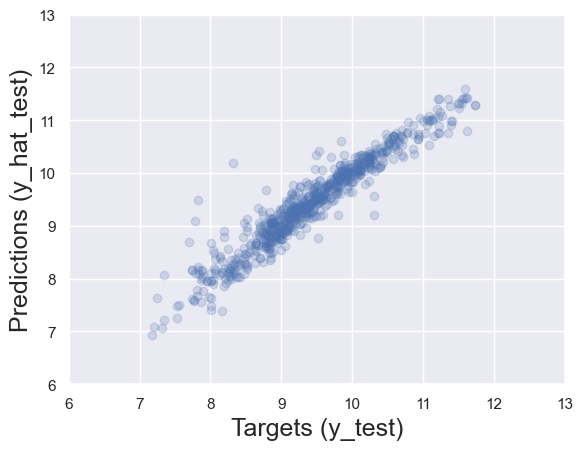

In [52]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [53]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,9050.274187
1,6324.282672
2,9762.562740
3,1815.923007
4,26654.272936


In [54]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = np.exp(y_test)
df_pf

# Note that we have a lot of missing values
# There is no reason to have ANY missing values, though
# This suggests that something is wrong with the data frame / indexing

,Prediction,Target
0,9050.274187,NaN
1,6324.282672,NaN
2,9762.562740,NaN
3,1815.923007,NaN
4,26654.272936,NaN
...,...,...
702,17415.072550,6300.0
703,10351.678618,13800.0
704,3499.495500,NaN
705,31083.762837,12500.0


In [55]:
# After displaying y_test, we find what the issue is
# The old indexes are preserved (recall earlier in that code we made a note on that)
# The code was: data_cleaned = data_4.reset_index(drop=True)

# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0    8.974618
1    8.987197
2    9.487972
3    7.549609
4    8.318742
Name: log_price, dtype: float64

In [56]:
# Let's overwrite the 'Target' column with the appropriate values
# Again, we need the exponential of the test log price
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,9050.274187,7900.00
1,6324.282672,8000.00
2,9762.562740,13200.00
3,1815.923007,1900.00
4,26654.272936,4100.00
...,...,...
702,17415.072550,15500.00
703,10351.678618,9200.00
704,3499.495500,2500.00
705,31083.762837,29500.00


In [57]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [58]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
pd.set_option('display.max_rows', 500)
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,9050.274187,7900.00,-1150.274187,14.560433
1,6324.282672,8000.00,1675.717328,20.946467
2,9762.562740,13200.00,3437.437260,26.041191
3,1815.923007,1900.00,84.076993,4.425105
4,26654.272936,4100.00,-22554.272936,550.104218
...,...,...,...,...
702,17415.072550,15500.00,-1915.072550,12.355307
703,10351.678618,9200.00,-1151.678618,12.518246
704,3499.495500,2500.00,-999.495500,39.979820
705,31083.762837,29500.00,-1583.762837,5.368688


In [59]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,707.000000,707.000000,707.000000,707.000000
mean,17838.027688,18409.095361,571.067673,19.386521
std,16550.888891,19640.224260,6417.258175,33.156738
min,1031.906782,1300.000000,-22554.272936,0.061975
25%,7304.409250,7000.000000,-1626.311543,5.772495
50%,12303.994434,11600.000000,-33.179135,12.608144
75%,22955.345700,21900.000000,1217.288072,22.557373
max,108130.637009,125000.000000,63360.513564,550.104218


In [60]:
df_pf["Difference%"].max(), df_pf["Difference%"].min()

(550.104217957437, 0.06197493843031218)

In [61]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
450,14709.11,14700.00,-9.11,0.06
483,23716.57,23700.00,-16.57,0.07
403,4394.96,4400.00,5.04,0.11
194,108130.64,107999.00,-131.64,0.12
283,3595.56,3600.00,4.44,0.12
18,19527.78,19500.00,-27.78,0.14
264,44063.64,43999.00,-64.64,0.15
130,11781.65,11800.00,18.35,0.16
284,65137.74,65000.00,-137.74,0.21
46,44106.69,43999.00,-107.69,0.24
